In [1]:
from urllib import request

import detectree as dtr
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio import plot

# download a tile from the SWISSIMAGE WMS
tile_url = (
    "https://wms.geo.admin.ch/?SERVICE=WMS&REQUEST=GetMap&VERSION=1.3.0&"
    "FORMAT=image/png&LAYERS=ch.swisstopo.images-swissimage&CRS=EPSG:2056"
    "&BBOX=2532980,1152150,2533380,1152450&WIDTH=800&HEIGHT=600"
)
tile_filename = "tile.png"
request.urlretrieve(tile_url, tile_filename)

# use the pre-trained model to segment the image into tree/non-tree-pixels
y_pred = dtr.Classifier().predict_img(tile_filename)

# side-by-side plot of the tile and the predicted tree/non-tree pixels
figwidth, figheight = plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(1, 2, figsize=(2 * figwidth, figheight))
with rio.open(tile_filename) as src:
    plot.show(src, ax=axes[0])
axes[1].imshow(y_pred)

/home/akz-workhorse/programming/NASA-Hackathon/.venv/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/home/akz-workhorse/programming/NASA-Hackathon/.venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/akz-workhorse/programming/NASA-Hackathon/.venv/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix wil

AttributeError: module 'maxflow' has no attribute 'Graph'

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from skimage import data, segmentation, color

# Load an example image
image = data.astronaut()

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Generate superpixels using SLIC
segments = segmentation.slic(image, compactness=30, n_segments=400)

# Create a graph representation of the image
graph = segmentation.felzenszwalb(image, scale=100, sigma=0.5)

# Perform graph cut segmentation
segment_mask = graph.cut_normalized()

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segment_mask, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'cut_normalized'

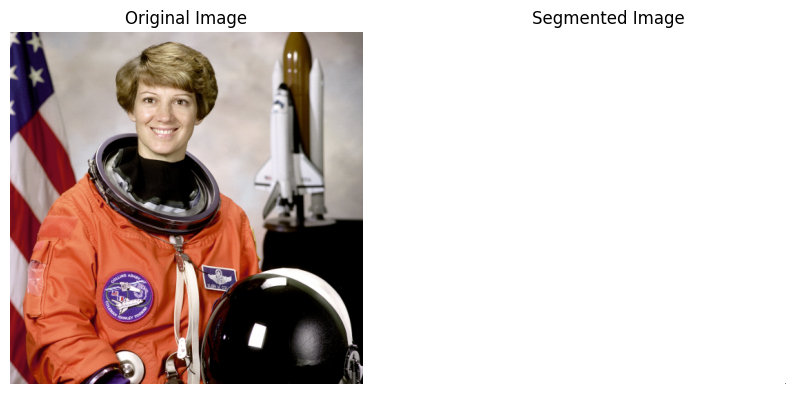

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from skimage import data, segmentation, color

# Load an example image
image = data.astronaut()

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Generate superpixels using SLIC
segments = segmentation.slic(image, compactness=30, n_segments=400)

# Create a graph representation of the image
graph = nx.grid_2d_graph(gray_image.shape[0], gray_image.shape[1])

# Add edges between adjacent pixels based on image gradients
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        if i < gray_image.shape[0] - 1:
            weight = np.abs(gray_image[i, j] - gray_image[i + 1, j])
            graph.add_edge((i, j), (i + 1, j), capacity=weight)
        if j < gray_image.shape[1] - 1:
            weight = np.abs(gray_image[i, j] - gray_image[i, j + 1])
            graph.add_edge((i, j), (i, j + 1), capacity=weight)

# Choose source and sink nodes within the graph bounds
source_node = (0, 0)
sink_node = (gray_image.shape[0] - 1, gray_image.shape[1] - 1)

# Perform minimum cut segmentation using maxflow
cut_value, partition = nx.minimum_cut(graph, source_node, sink_node)

# Extract the segmented region
reachable, non_reachable = partition

# Create a binary mask for the segmented region
segment_mask = np.zeros_like(gray_image, dtype=bool)
for node in reachable:
    segment_mask[node] = True

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segment_mask, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')
plt.show()


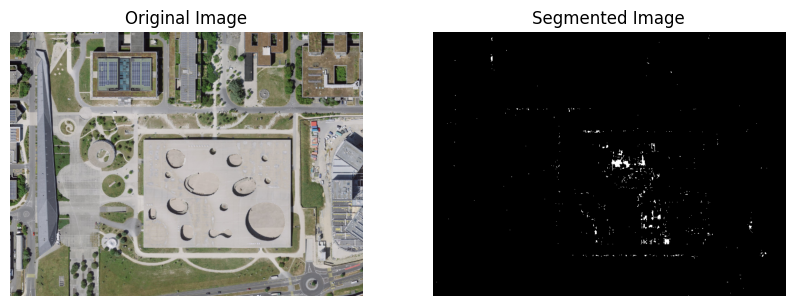

In [8]:
import matplotlib.pyplot as plt
from skimage import color, segmentation
import numpy as np
import networkx as nx

# Load an example image
image = plt.imread('tile.png')

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]  # Keep only the RGB channels

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Generate superpixels using SLIC
segments = segmentation.slic(image, compactness=30, n_segments=400)

# Create a graph representation of the image
graph = nx.grid_2d_graph(gray_image.shape[0], gray_image.shape[1])

# Add edges between adjacent pixels based on image gradients
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        if i < gray_image.shape[0] - 1:
            weight = np.abs(gray_image[i, j] - gray_image[i + 1, j])
            graph.add_edge((i, j), (i + 1, j), capacity=weight)
        if j < gray_image.shape[1] - 1:
            weight = np.abs(gray_image[i, j] - gray_image[i, j + 1])
            graph.add_edge((i, j), (i, j + 1), capacity=weight)

# Choose source and sink nodes within the graph bounds
source_node = (0, 0)
sink_node = (gray_image.shape[0] - 1, gray_image.shape[1] - 1)

# Perform minimum cut segmentation using maxflow
cut_value, partition = nx.minimum_cut(graph, source_node, sink_node)

# Extract the segmented region
reachable, non_reachable = partition

# Create a binary mask for the segmented region
segment_mask = np.zeros_like(gray_image, dtype=bool)
for node in reachable:
    segment_mask[node] = True

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segment_mask, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')
plt.show()
